In [8]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv(r"C:\Users\USER\Desktop\tp53_blast_features.csv")

# Add log_evalue feature
df["log_evalue"] = -np.log10(df["evalue"].replace(0, 1e-300))

# Features and labels
X = df[["pident", "bitscore", "coverage", "length", "qlen", "slen", "log_evalue"]]
y = df["label"]

print(X.head())
print(y.value_counts())


    pident  bitscore  coverage  length  qlen  slen  log_evalue
0  100.000       813  1.000000     393   393   393       300.0
1  100.000       813  1.000000     393   393   393       300.0
2   98.476       670  0.813896     328   393   403       300.0
3   97.710       800  0.940191     393   393   418       300.0
4   96.183       785  1.000000     393   393   393       300.0
label
distant    29
close      20
Name: count, dtype: int64


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [11]:
# Load dataset
df = pd.read_csv(r"C:\Users\USER\Desktop\tp53_blast_features.csv")

# Transform e-value → log scale
df["log_evalue"] = -np.log10(df["evalue"].replace(0, 1e-300))

# Features
X = df[["pident", "bitscore", "coverage", "length", "qlen", "slen", "log_evalue"]]

# Encode labels: distant=0, close=1
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["label"])

print("Classes mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
print("y values (first 10):", y[:10])


Classes mapping: {'close': np.int64(0), 'distant': np.int64(1)}
y values (first 10): [0 0 0 1 1 1 1 0 0 1]


In [12]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "RandomForest": RandomForestClassifier(n_estimators=600, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=6,
                             eval_metric="logloss", use_label_encoder=False, random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=500, learning_rate=0.05, max_depth=-1,
                               random_state=42)
}



Running RandomForest...


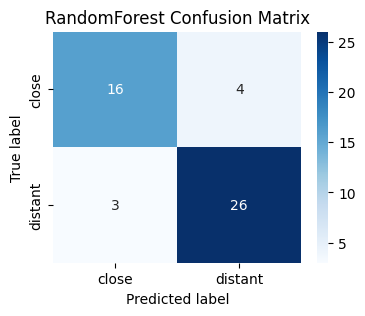


Running XGBoost...


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:13:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:13:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:13:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:13:19] WARNING: C:\actions-r

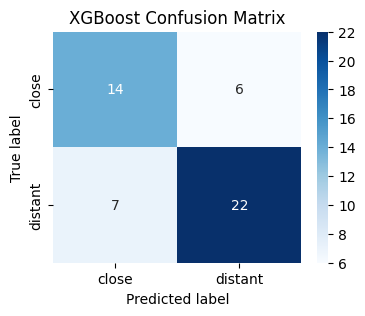


Running LightGBM...
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 23, number of negative: 16
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 39, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.589744 -> initscore=0.362905
[LightGBM] [Info] Start training from score 0.362905
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWa

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 23, number of negative: 16
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 39, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.589744 -> initscore=0.362905
[LightGBM] [Info] Start training from score 0.362905
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because the

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


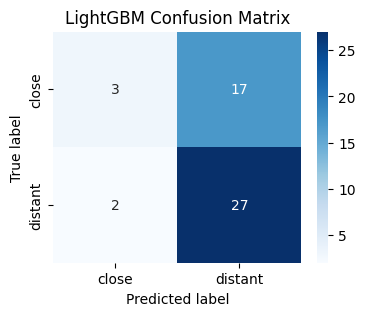

,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,RandomForest,0.857143,0.866667,0.896552,0.881356,0.856897
1,XGBoost,0.734694,0.785714,0.758621,0.771930,0.844828
2,LightGBM,0.612245,0.613636,0.931034,0.739726,0.561207


In [13]:
results = []

for name, model in models.items():
    print(f"\nRunning {name}...")
    pipe = Pipeline([("scaler", StandardScaler()), ("clf", model)])

    # Cross-validated predictions
    y_pred = cross_val_predict(pipe, X, y, cv=cv, method="predict")
    y_prob = cross_val_predict(pipe, X, y, cv=cv, method="predict_proba")[:, 1]

    # Metrics
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc = roc_auc_score(y, y_prob)

    results.append([name, acc, prec, rec, f1, roc])

    # Confusion matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f"{name} Confusion Matrix")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1", "ROC-AUC"])
display(results_df)


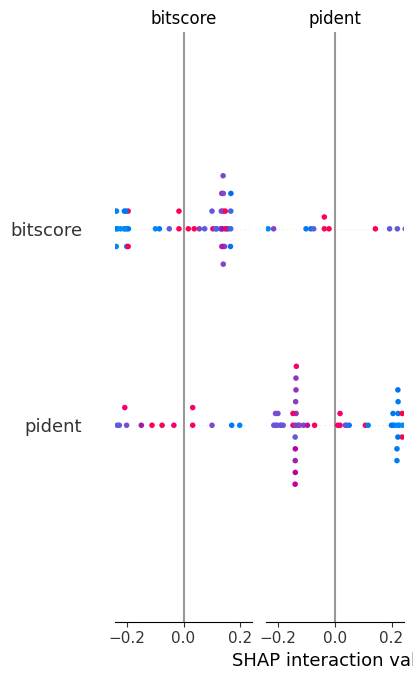

In [16]:
# Refit RF to ensure consistency
rf_model = RandomForestClassifier(n_estimators=600, random_state=42)
rf_model.fit(X, y)

# Use new SHAP API
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer(X)  # returns a shap.Explanation object

# Summary plot
shap.summary_plot(shap_values, X, feature_names=X.columns)
